<a href="https://colab.research.google.com/github/afislonge/Algerian-forest-fire-ML/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Effective Handling of Errors
Ensure the dataset is clean, handle missing data, outliers, and ensure correct data types.

In [53]:
# Load the dataset
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Top 5
print("top 5 row using head")
print(df.head())
print()

# Bottom 5
print("bottom 5 row using head")
print(df.tail())
print()

# number of samples and columns
print("number of samples and columns")
print(df.shape)
print()

# number of entries in the dataframe
print("number of entries in the dataframe")
print(df.size)
print()

# column names in the dataframe
print("column names in the dataframe")
print(df.columns)
print()

# column name dtypes in the dataframe
print("column name dtypes in the dataframe")
print(df.dtypes)
print()

# dataframe info
print("dataframe info")
print(df.info())
print()

# check missing
print("check the missing value in each column")
print(df.isnull().sum())
print()

# check missing
print("check the missing value in each column")
print(df.isna().sum())
print()

# Check for duplicates
print("Check for duplicates")
print(df.duplicated().sum())
print()

# dataframe description
print("dataframe description")
print(df.describe())
print()

top 5 row using head
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  

bottom 5 row using head
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  

## Appropriate Feature Selection and Engineering
Identify and create the most relevant features for the model.

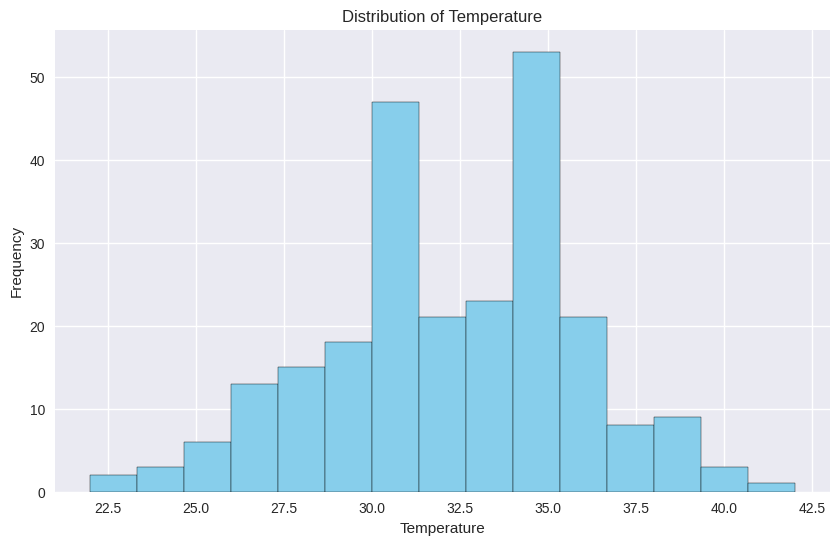

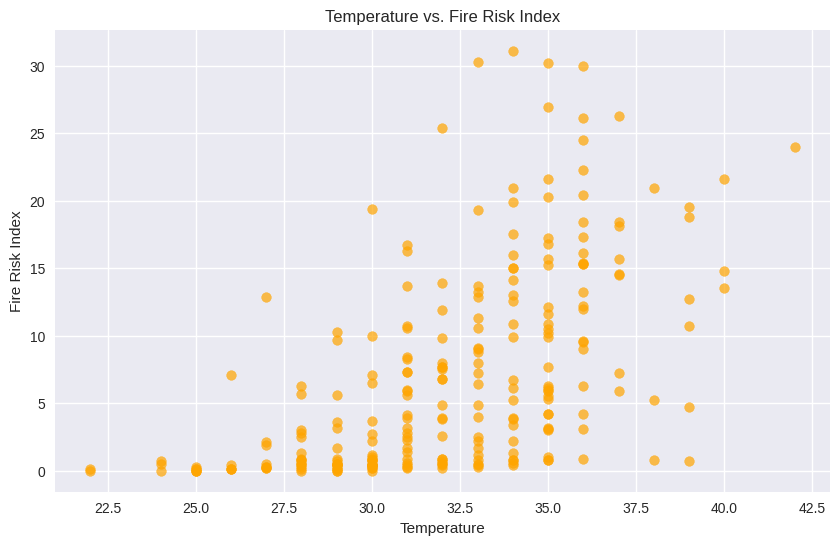

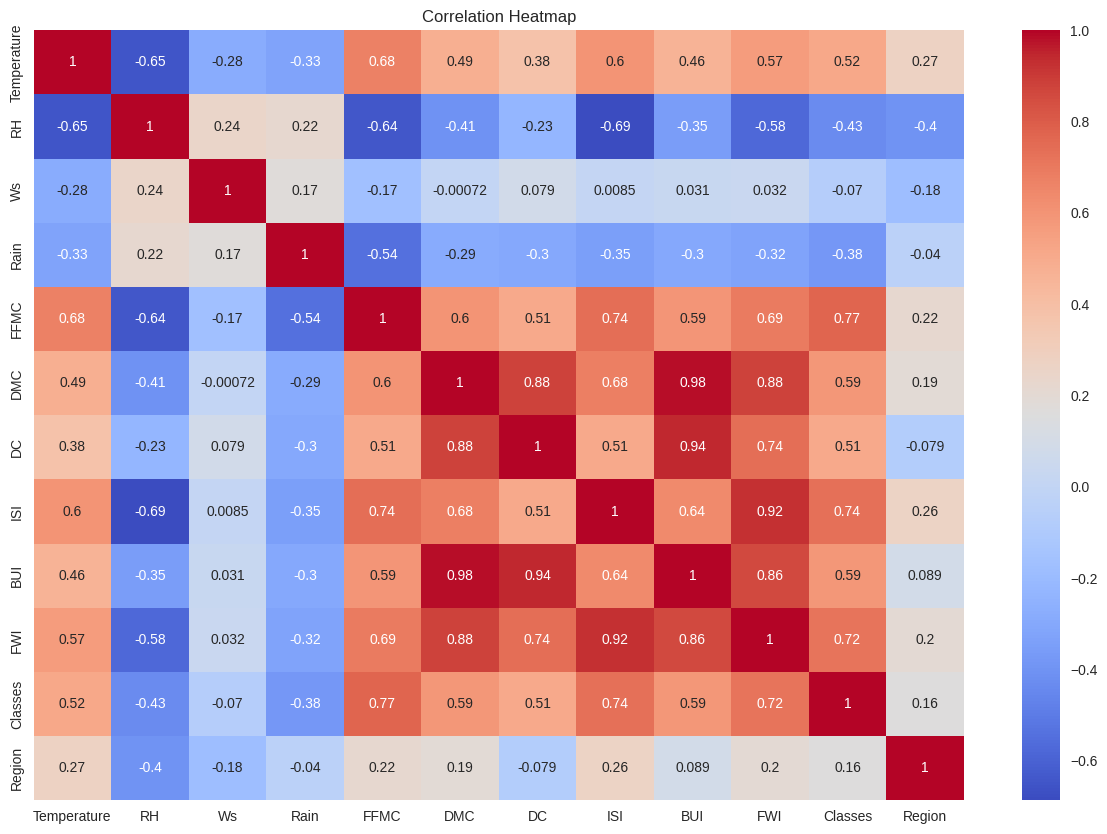

In [54]:
df_copy = df.drop(['day','month','year'],axis=1)

df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

corr = df_copy.corr()

# Histogram of Temperature
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Temperature vs. Fire Risk Index
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['FWI'], alpha=0.7, color='orange')
plt.title('Temperature vs. Fire Risk Index')
plt.xlabel('Temperature')
plt.ylabel('Fire Risk Index')
plt.show()

# Heatmap for correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [55]:
from sklearn.preprocessing import StandardScaler

# Selecting important features
features = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI']]
target = df['FWI']

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## Creation of Insightful Visualizations
Generate visualizations to understand the data distribution, relationships, and trends.

<Figure size 1000x600 with 0 Axes>

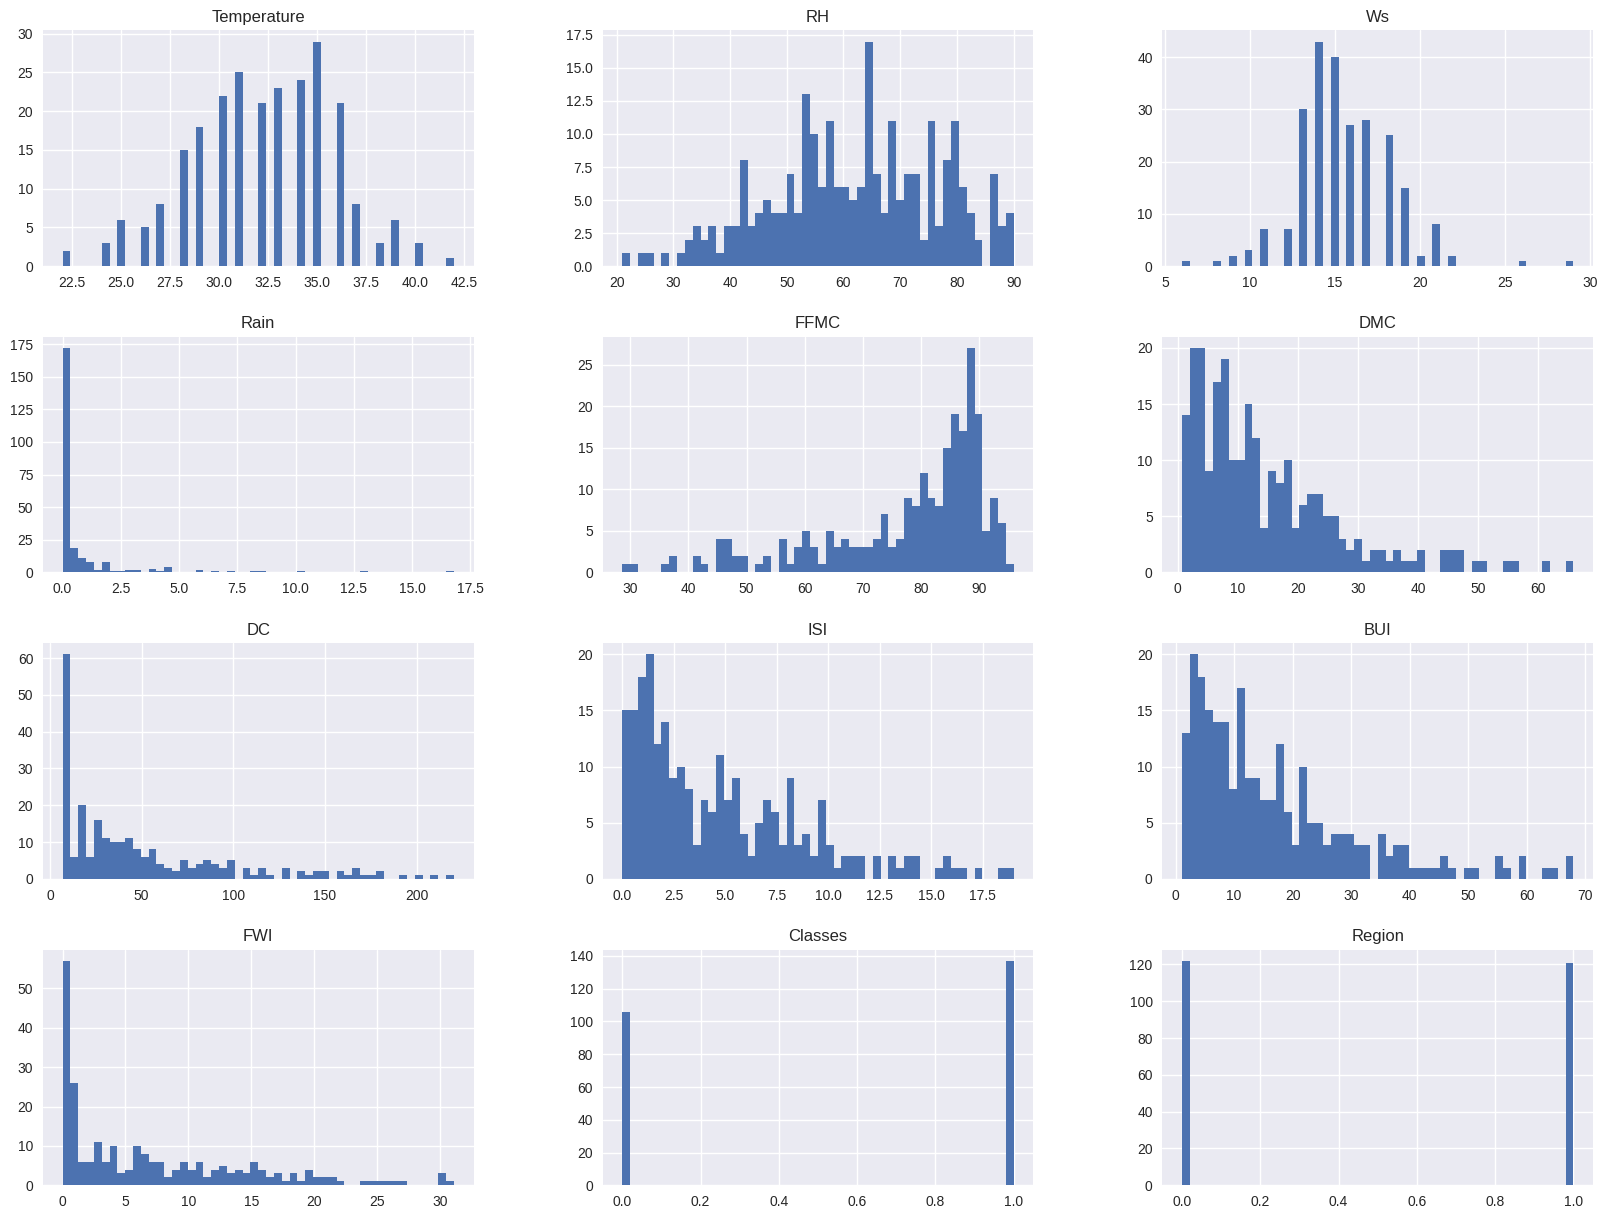

In [56]:

## Plot desnity plot for all features
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Visualization 1: Temperature vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='Temperature', data=df)
plt.title('Temperature vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Temperature (°C)')
plt.show()

# Visualization 2: RH vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='RH', data=df)
plt.title('Relative Humidity (RH) vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Relative Humidity (%)')
plt.show()

# Visualization 3: Wind Speed vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='Ws', data=df)
plt.title('Wind Speed vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Wind Speed (km/h)')
plt.show()

# Visualization 4: Rain vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='Rain', data=df)
plt.title('Rain vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Rain (mm)')
plt.show()

# Visualization 5: FFMC vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='FFMC', data=df)
plt.title('FFMC vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('FFMC')
plt.show()

## Clear and Meaningful Observations Derived from the Visualizations
Extract meaningful insights from the visualizations to inform feature selection and modeling.

# **Based on the visualizations, we can derive the following observations:**

* Temperature Distribution: The histogram shows that temperatures are mostly concentrated between 25°C and 35°C.

* Fire Risk: The scatter plot indicates that higher temperatures are associated with a higher fire risk index.

* Correlation Insights: The heatmap reveals a strong correlation between Temperature, FFMC, and FWI, suggesting these are key predictors for fire occurrences.

## Implementation of Multiple Linear Regression and Polynomial Regression Models
Build and compare linear and polynomial regression models to predict the target variable.

In [57]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
df['Classes'].value_counts()



,count
Classes,
1,137
0,106


In [58]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [69]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [59]:
# split the input data & target into train & test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [61]:
# scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

In [62]:
# liner regression and polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

lr=LinearRegression()

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train_sc)
x_test_pr=pr.transform(x_test_sc)


## Application of Regularization Techniques (Lasso, Ridge, etc.)
Implement and compare regularization techniques to prevent overfitting.

In [63]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# intiate the object_names for models
rd=Ridge(alpha=0.01)
ls=Lasso(alpha=0.01)
en=ElasticNet(alpha=0.01)

##  Effective Use of Cross-Validation and Hyperparameter Tuning
Optimize the models using cross-validation and tune hyperparameters for better performance.

## Comprehensive Evaluation of Model Performance
Assess the models using appropriate metrics and compare their performance.

In [65]:
# train the model
print("Performance Metrics of Linear Regression Model")
print()
lr.fit(x_train_sc, y_train)
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc) # prediction on train_data
y_pred_ts=lr.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

print()
print("="*150)

print("Performance Metrics of Polynomial Regression Model")
print()
# Train the Polynomial Regression model
model = LinearRegression()
model.fit(x_train_pr, y_train)

y_pred = model.predict(x_test_pr)
print("coefficients", model.coef_)
print("intercept", model.intercept_)
y_pred_tr=model.predict(x_train_pr) # prediction on train_data
y_pred_ts=model.predict(x_test_pr) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)

print("Performance Metrics of Ridge Regression Model")
print()
rd.fit(x_train_sc, y_train)
print("coefficients", rd.coef_)
print("intercept", rd.intercept_)
y_pred_tr=rd.predict(x_train_sc) # prediction on train_data
y_pred_ts=rd.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of Lasso Regression Model")
print()
ls.fit(x_train_sc, y_train)
print("coefficients", ls.coef_)
print("intercept", ls.intercept_)
y_pred_tr=ls.predict(x_train_sc) # prediction on train_data
y_pred_ts=ls.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of ElasticNet Regression Model")
print()
en.fit(x_train_sc, y_train)
print("coefficients", en.coef_)
print("intercept", en.intercept_)
y_pred_tr=en.predict(x_train_sc) # prediction on train_data
y_pred_ts=en.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

Performance Metrics of Linear Regression Model

coefficients [-0.06841364 -0.20629254 -0.08583863  0.00908103 -0.87871358  0.90668555
 -0.20761107  5.07422311  3.08272438  0.29418335 -0.17948217]
intercept 7.420103092783506


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.9737558301667233
mean_absolute_error 0.6764092608548995
mean_squared_error 1.5922515862521087
root_mean_squared_error 1.2618445174632684

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score 0.9890356825759857
mean_absolute_error 0.4267520614689853
mean_squared_error 0.33231115384863824
root_mean_squared_error 0.5764643560955337

Performance Metrics of Polynomial Regression Model

coefficients [-4.10886433e-13  1.41887157e-01 -1.81390512e-01  4.02978253e-01
  1.62518489e-01  5.559592

## Testing the Model on Unseen Data
Validate the model on a test dataset and analyze the results.

In [35]:
import pickle

pickle.dump(scaler, open('fire_prediction_sc.pkl', 'wb'))
pickle.dump(lr, open('fire_prediction_model.pkl', 'wb'))

In [66]:
sc = pickle.load(open('fire_prediction_sc.pkl','rb'))
model = pickle.load(open('fire_prediction_model.pkl','rb'))

In [ ]:
# predict house price

# ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

unkown_data = {'MedInc':[3.5, 4.7, 8.2, 0, 12.5],
               'HouseAge':[10, 5, 7, 15, 22],
               'AveRooms':[11, 14, 18, 25, 35],
               'AveBedrms':[3, 6, 7, 4, 10],
               'Population':[1000, 5000, 10000, 15000, 25000],
               'AveOccup':[5, 15, 8, 11, 20],
               'Latitude':[33, 34, 37, 40, 36],
               'Longitude':[-118, -122, -121, -123, -124]}

In [ ]:
df1 = pd.DataFrame(unkown_data)
df1

In [ ]:
sc_df1 = sc.transform(df1)
sc_df1

In [ ]:
model.predict(sc_df1)